In [490]:
##this is a dataset about restaurant sales including transactions and method of paying,item and price
##i intend to answer many questions such as correlation between amount and method of paying
##most ordered item, when resturant is most busy
##which season restaurant is most busy in

In [491]:
import pandas as pd
import numpy as np 


In [492]:
df=pd.read_csv('restaurant_sales_data.csv')

In [493]:
df.head(20)
df

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,NaN,NaN,4.0,4.0,2023-12-23,Cash
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet


In [494]:
df.describe() ##checking for negative,inf and impossible values

,Price,Quantity,Order Total
count,16658.000000,17104.000000,17104.000000
mean,6.586325,3.014149,19.914494
std,4.834652,1.414598,18.732549
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,7.500000
50%,5.000000,3.000000,15.000000
75%,7.000000,4.000000,25.000000
max,20.000000,5.000000,100.000000


In [495]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        17534 non-null  object 
 1   Customer ID     17534 non-null  object 
 2   Category        17534 non-null  object 
 3   Item            15776 non-null  object 
 4   Price           16658 non-null  float64
 5   Quantity        17104 non-null  float64
 6   Order Total     17104 non-null  float64
 7   Order Date      17534 non-null  object 
 8   Payment Method  16452 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.2+ MB


In [496]:
(df.isnull().sum()/df.shape[0])*100

Order ID           0.000000
Customer ID        0.000000
Category           0.000000
Item              10.026235
Price              4.996008
Quantity           2.452378
Order Total        2.452378
Order Date         0.000000
Payment Method     6.170868
dtype: float64

In [497]:
df.duplicated().sum()

np.int64(0)

In [498]:
##i have now inspected the data and checked that it has 17534 entries,9 feature columns, and as of now the percentages of the 
##missing values and duplicated,and data types of each column
##there are duplicates of the customers but cannot be removed as they are recurring customers so important data

In [499]:
##removing and imputing null values , rows with less than 5% will be dropped,others will be imputed

In [500]:
df.dropna(subset='Quantity',axis=0,inplace=True)
df.dropna(subset=['Order Total','Price'],axis=0,inplace=True)

In [501]:
##for payment method i will use knn imputer and for item i will use simple imputer

In [502]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
simpleimputer=SimpleImputer(strategy='most_frequent')##using mode as categorical
knnimputer=KNNImputer(n_neighbors=1)
##i will use k=1 as if price matches its likely the same item

In [503]:
df['Payment Method']=simpleimputer.fit_transform(df[['Payment Method']]).ravel()

In [504]:
#df['Item']=knnimputer.fit_transform(df[['Item']])


In [505]:
##we do one hot encoding first as knn didnt work as it cannot work with strings as distances so we encode them

In [506]:
df.isna().sum() ##only na in items so knn

Order ID            0
Customer ID         0
Category            0
Item              882
Price               0
Quantity            0
Order Total         0
Order Date          0
Payment Method      0
dtype: int64

In [507]:
cols=['Order ID', 'Customer ID', 'Category', 'Item', 'Price', 'Quantity',
       'Order Total', 'Order Date', 'Payment Method']
features_of_knn=pd.DataFrame()
features_of_knn[cols]=df[cols]

In [508]:
features_of_knn.drop(['Order ID','Customer ID','Order Date','Payment Method'],axis=1,inplace=True)
##removing order and customer id out of knn for correct imputations as both cols do not give me info, i will also encode
##the category just for knn

In [509]:
features_of_knn['Category'].unique()

array(['Side Dishes', 'Main Dishes', 'Desserts', 'Starters', 'Drinks'],
      dtype=object)

In [510]:
features_of_knn['Item'].unique()

array(['Side Salad', 'Mashed Potatoes', 'Grilled Chicken',
       'Pasta Alfredo', 'Salmon', 'Garlic Bread', nan,
       'Vegetarian Platter', 'Brownie', 'Sweet Potato Fries', 'Lemonade',
       'Orange Juice', 'Chocolate Cake', 'Coca Cola',
       'Grilled Vegetables', 'Cheese Fries', 'Beef Chili', 'Chicken Melt',
       'Fruit Salad', 'French Fries', 'Ice Cream', 'Cheesecake',
       'Iced Tea', 'Water', 'Nachos Grande', 'Onion Rings', 'Steak'],
      dtype=object)

In [511]:
category_dict={
'Main Dishes':5
,'Starters':4
,'Desserts':3
,'Side Dishes':2
,'Drinks':1
}

items_dict={
            'Side Salad':0,
            'Mashed Potatoes':1,
            'Grilled Chicken':2,
            'Pasta Alfredo':3, 
            'Salmon':4, 
            'Garlic Bread':5,
            'Vegetarian Platter':6,
            'Brownie':7, 
            'Sweet Potato Fries':8,
            'Lemonade':9,
            'Orange Juice':10,
            'Chocolate Cake':11,
            'Coca Cola':12,
            'Grilled Vegetables':13,
            'Cheese Fries':14,
            'Beef Chili':15, 
            'Chicken Melt':16,
            'Fruit Salad':17,
            'French Fries':18,
            'Ice Cream':19,
            'Cheesecake':20,
            'Iced Tea':21,
            'Water':22,
            'Nachos Grande':23, 
            'Onion Rings':24,
            'Steak':25
            }
items_dict_reversed = {v: k for k, v in items_dict.items()}

##setting categories from most expensive to least for more correct imputation

In [512]:
features_of_knn['Category']=features_of_knn['Category'].map(category_dict)

In [513]:
features_of_knn['Item']=features_of_knn['Item'].map(items_dict)
features_of_knn.isna().sum()

Category         0
Item           882
Price            0
Quantity         0
Order Total      0
dtype: int64

In [514]:
df_imputed=knnimputer.fit_transform(features_of_knn)

In [515]:
df_imputed=pd.DataFrame(df_imputed,columns=features_of_knn.columns)

In [516]:
df_imputed['Item'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  7.,  6.,  8.,  9., 17., 10., 11.,
       12., 13., 14., 15., 16., 18., 19., 20., 21., 22., 23., 24., 25.])

In [517]:
df_imputed['Item']=df_imputed['Item'].round().astype(int)
df_imputed['Item']=df_imputed['Item'].map(items_dict_reversed)

##reversing the ordinal encoding

In [518]:
df['Item']=df_imputed['Item']
##taking the imputed item col to my original dataset

In [519]:
df.head()

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Salmon,12.0,4.0,48.0,2022-05-15,Cash
5,ORD_381680,CUST_031,Main Dishes,Garlic Bread,18.0,5.0,90.0,2022-07-20,Digital Wallet


In [575]:
df.isnull().sum()

Order ID                           0
Customer ID                        0
Item_0                             0
Item_1                             0
Item_2                             0
Item_3                             0
Item_4                             0
Price                              0
Quantity                           0
Order Total                        0
Order Date                         0
Month                              0
Year                               0
Day                                0
Day Name                           0
Season                             0
Customer Past Orders               0
Customer Total Spent               0
Category_Label                     0
Item_Label                       828
Payment Method_Label               0
Payment Method_Cash                0
Payment Method_Credit Card         0
Payment Method_Digital Wallet      0
Category_Desserts                  0
Category_Drinks                    0
Category_Main Dishes               0
C

In [521]:
##we have now imputed and i will move on to fixing data types

In [522]:
df.info() ##order date needs to be converted to datetime for future feature extraction

<class 'pandas.core.frame.DataFrame'>
Index: 16658 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        16658 non-null  object 
 1   Customer ID     16658 non-null  object 
 2   Category        16658 non-null  object 
 3   Item            15830 non-null  object 
 4   Price           16658 non-null  float64
 5   Quantity        16658 non-null  float64
 6   Order Total     16658 non-null  float64
 7   Order Date      16658 non-null  object 
 8   Payment Method  16658 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.3+ MB


In [523]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [524]:
df.head()

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Salmon,12.0,4.0,48.0,2022-05-15,Cash
5,ORD_381680,CUST_031,Main Dishes,Garlic Bread,18.0,5.0,90.0,2022-07-20,Digital Wallet


In [525]:
import seaborn as sns

<Axes: xlabel='Price'>

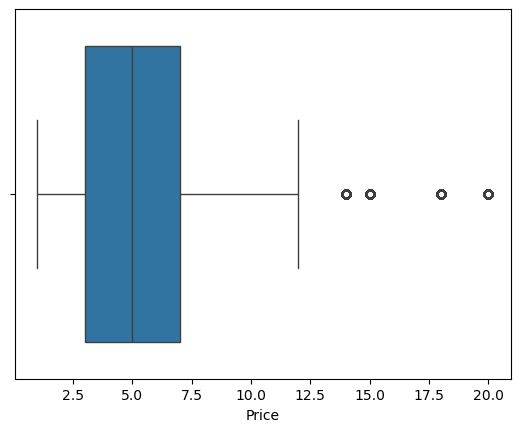

In [526]:
sns.boxplot(df,x='Price') ##outliers shouldnt be removed here as its the price of the dishes

<Axes: xlabel='Order Total'>

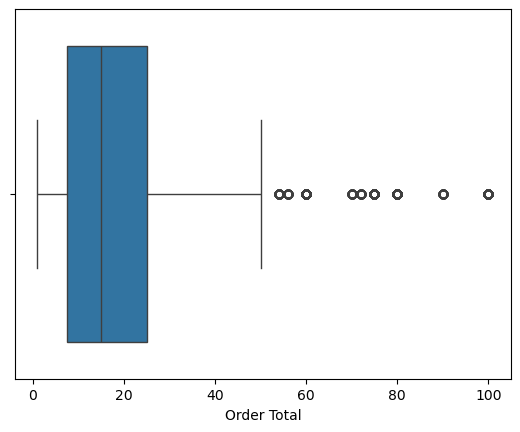

In [527]:
sns.boxplot(df,x='Order Total')

<Axes: xlabel='Payment Method', ylabel='Count'>

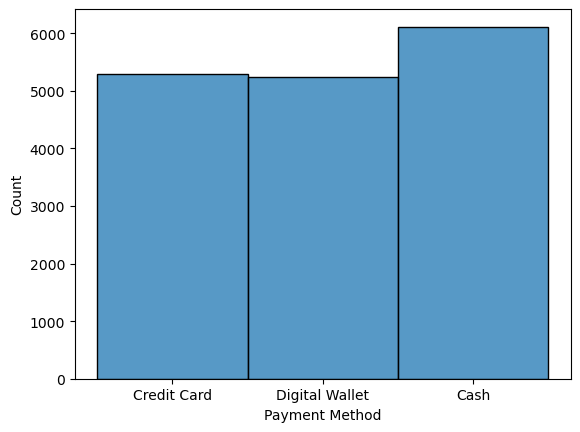

In [528]:
sns.histplot(df,x='Payment Method') ##data almost balanced, might do undersampling for cash records later or smot on credit card and
##digital wallet

<Axes: xlabel='Category', ylabel='Count'>

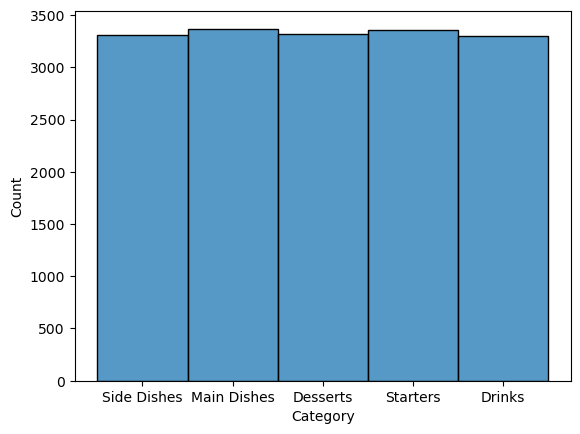

In [529]:
sns.histplot(df,x='Category') ##almost perfectly balanced 

<Axes: xlabel='Item', ylabel='Count'>

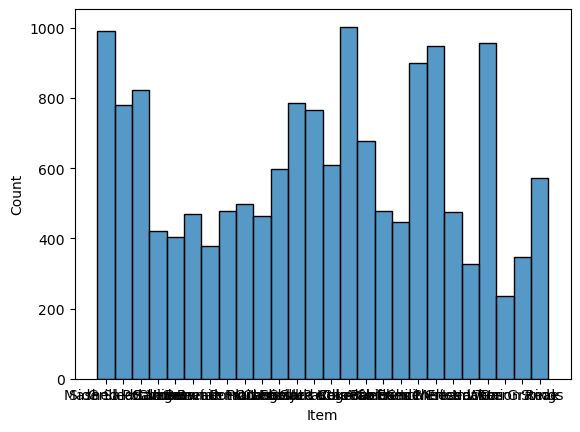

In [530]:
sns.histplot(df,x='Item')

<Axes: xlabel='Quantity', ylabel='Order Total'>

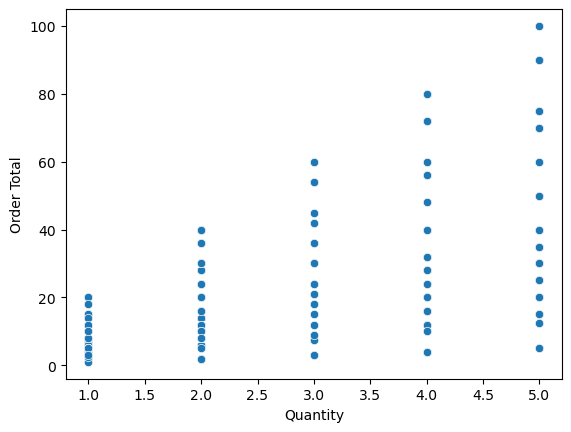

In [531]:
sns.scatterplot(df,x='Quantity',y='Order Total')

In [532]:
##after checking the data using a couple of plots and detecting outliers in this case which will not be removed

In [533]:
df['Item']=df['Item'].str.replace('Item_','')

In [534]:
##feature engineering

In [535]:
df.head()

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Salmon,12.0,4.0,48.0,2022-05-15,Cash
5,ORD_381680,CUST_031,Main Dishes,Garlic Bread,18.0,5.0,90.0,2022-07-20,Digital Wallet


In [536]:
df['Month']=df['Order Date'].dt.month
df['Year']=df['Order Date'].dt.year
df['Day']=df['Order Date'].dt.day
df['Day Name']=df['Order Date'].dt.day_name()

In [537]:
def order_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else: return 'Fall'

In [538]:
df['Season']=df['Month'].apply(order_season)

In [539]:
df.sort_values(by='Order Date',inplace=True)

In [540]:
df.reset_index(inplace=True)

In [541]:
df.drop('index',axis=1,inplace=True)

In [542]:
##i ordered in order date so that i can do feature engineering based on previous orders such as how many times this customer has 
##ordered 

In [543]:
df['Customer Past Orders']=df.groupby('Customer ID').cumcount()

In [544]:
df['Customer Total Spent']=df.groupby('Customer ID')['Order Total'].cumsum()

In [545]:
##encoding categorical data
##for Payment Method i will use one hot encoding as it is only 3 categories and have no order or priority
##same for category as order of the drinks or starters will not differ in my analysis

In [546]:
df['Category_Label']=df['Category']
df['Item_Label']=df['Item']
df['Payment Method_Label']=df['Payment Method'] 
##keeping the columns so that i can concat and use in streamlit
##or drop if the data will go to ML 

In [547]:
df=pd.get_dummies(df,columns=['Payment Method','Category'])

In [548]:
##for items as they are alot and have no order i will use binary encoding 

In [549]:
from category_encoders import BinaryEncoder
binaryencoder=BinaryEncoder(cols=['Item'])
df=binaryencoder.fit_transform(df)

In [550]:
##feature scaling
df.head()
##

,Order ID,Customer ID,Item_0,Item_1,Item_2,Item_3,Item_4,Price,Quantity,Order Total,...,Item_Label,Payment Method_Label,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Category_Desserts,Category_Drinks,Category_Main Dishes,Category_Side Dishes,Category_Starters
0,ORD_543574,CUST_053,0,0,0,0,1,8.0,1.0,8.0,...,Mashed Potatoes,Digital Wallet,False,False,True,False,False,False,False,True
1,ORD_924739,CUST_025,0,0,0,1,0,6.0,4.0,24.0,...,Vegetarian Platter,Credit Card,False,True,False,True,False,False,False,False
2,ORD_765188,CUST_037,0,0,0,1,1,4.0,5.0,20.0,...,Brownie,Cash,True,False,False,False,False,False,False,True
3,ORD_339563,CUST_053,0,0,1,0,0,5.0,5.0,25.0,...,Sweet Potato Fries,Credit Card,False,True,False,True,False,False,False,False
4,ORD_471018,CUST_003,0,0,1,0,1,4.0,1.0,4.0,...,Salmon,Credit Card,False,True,False,True,False,False,False,False


In [551]:
df.describe()

,Item_0,Item_1,Item_2,Item_3,Item_4,Price,Quantity,Order Total,Order Date,Month,Year,Day,Customer Past Orders,Customer Total Spent
count,16658.000000,16658.000000,16658.000000,16658.000000,16658.000000,16658.000000,16658.000000,16658.000000,16658,16658.000000,16658.000000,16658.000000,16658.000000,16658.000000
mean,0.416677,0.471725,0.408452,0.537399,0.539320,6.586325,3.017349,19.921899,2022-12-28 13:19:42.134709760,6.521011,2022.492316,15.736763,83.274343,1688.659113
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2022-01-01 00:00:00,1.000000,2022.000000,1.000000,0.000000,2.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,7.500000,2022-06-30 00:00:00,4.000000,2022.000000,8.000000,41.000000,847.625000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,15.000000,2022-12-25 00:00:00,7.000000,2022.000000,16.000000,83.000000,1664.250000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,25.000000,2023-06-28 00:00:00,10.000000,2023.000000,23.000000,124.000000,2500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,5.000000,100.000000,2023-12-31 00:00:00,12.000000,2023.000000,31.000000,200.000000,4068.500000
std,0.493023,0.499215,0.491562,0.498614,0.498466,4.834652,1.413619,18.710097,NaN,3.438402,0.499956,8.865943,48.914629,988.725083


In [552]:
##for feature scaling i will use standard scaling as it is the most safe and makes the most sense
##in this dataset as there are no extreme outliers
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [553]:
df['Price_Scaled']=scaler.fit_transform(df[['Price']])
df['Order Total_Scaled']=scaler.fit_transform(df[['Order Total']])
df['Quantity_Scaled']=scaler.fit_transform(df[['Quantity']])

In [554]:
##i have not dropped or removed the original cols to make it easier in streamlit and have the original quantities and price for
## a nice dashboard

In [555]:
##EDA
import plotly.express as px
df.columns

Index(['Order ID', 'Customer ID', 'Item_0', 'Item_1', 'Item_2', 'Item_3',
       'Item_4', 'Price', 'Quantity', 'Order Total', 'Order Date', 'Month',
       'Year', 'Day', 'Day Name', 'Season', 'Customer Past Orders',
       'Customer Total Spent', 'Category_Label', 'Item_Label',
       'Payment Method_Label', 'Payment Method_Cash',
       'Payment Method_Credit Card', 'Payment Method_Digital Wallet',
       'Category_Desserts', 'Category_Drinks', 'Category_Main Dishes',
       'Category_Side Dishes', 'Category_Starters', 'Price_Scaled',
       'Order Total_Scaled', 'Quantity_Scaled'],
      dtype='object')

In [556]:
px.bar(df['Order Total'].value_counts())
##right skewed data, most orders are cheap

<Axes: xlabel='Quantity', ylabel='count'>

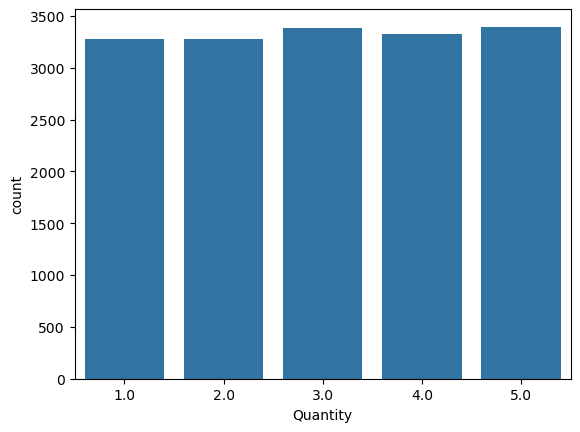

In [557]:
sns.countplot(x=df['Quantity'])
##typical behavior of how many items people buy

<Axes: xlabel='count', ylabel='Customer Past Orders'>

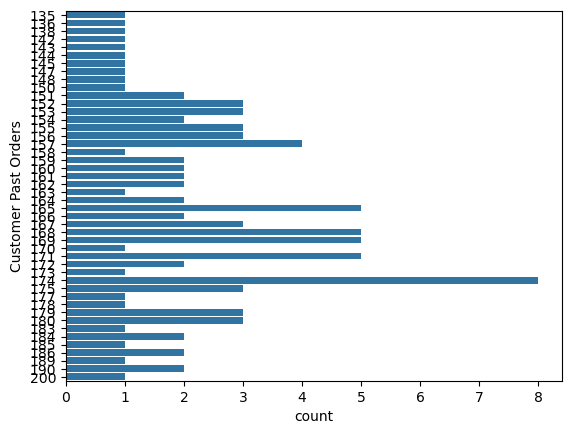

In [558]:
customer_orders = (
    df.groupby('Customer ID')['Customer Past Orders']
      .max()
      .reset_index()
)
sns.countplot(y=customer_orders['Customer Past Orders'])
##all customers have above 135 past orders


<Axes: xlabel='Category_Label', ylabel='count'>

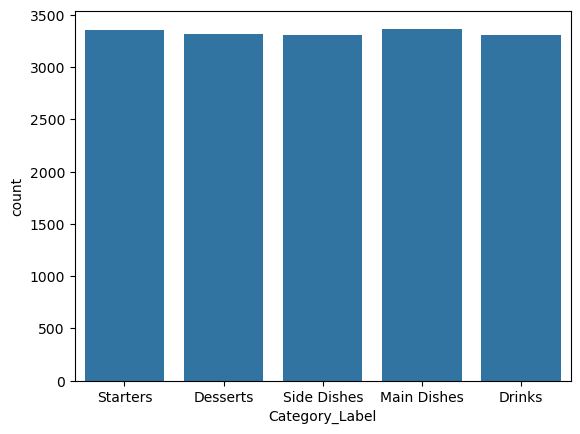

In [559]:
sns.countplot(df,x='Category_Label')
##all categories are being ordered with no category behind

<Axes: xlabel='count', ylabel='Item_Label'>

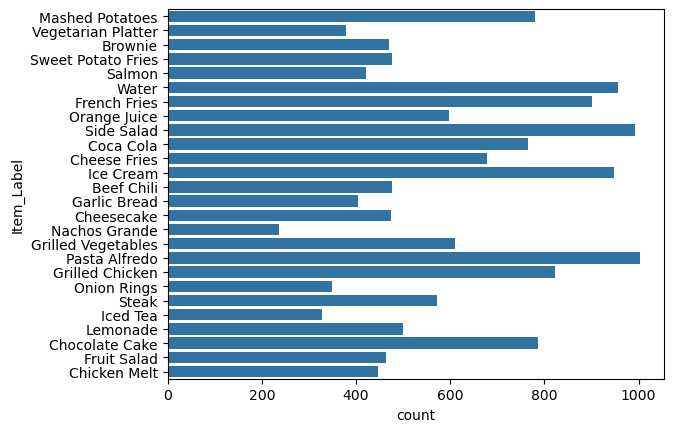

In [560]:
sns.countplot(df,y='Item_Label')
##beef chili is the most ordered item

<Axes: xlabel='Payment Method_Label', ylabel='count'>

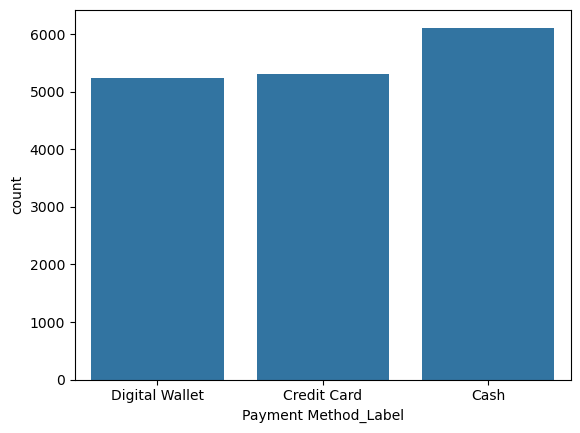

In [561]:
sns.countplot(df,x='Payment Method_Label')
#cash is the most used method of payment

<Axes: xlabel='Season', ylabel='count'>

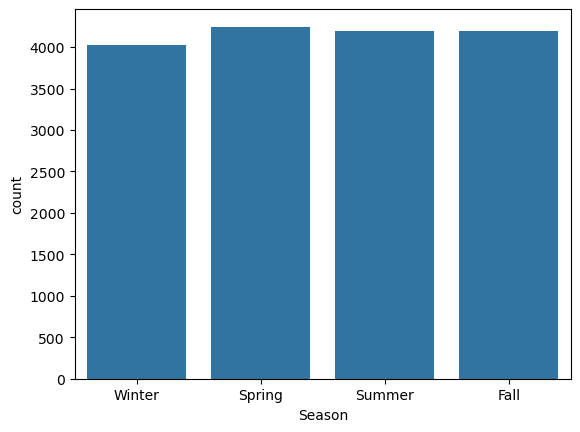

In [562]:
sns.countplot(df,x='Season')
#spring has the most orders

<Axes: xlabel='Month', ylabel='count'>

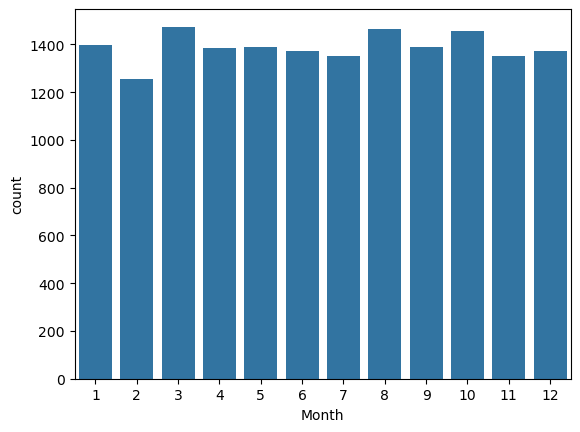

In [563]:
sns.countplot(df,x='Month')
#march is the most ordered month

<Axes: xlabel='Order Total'>

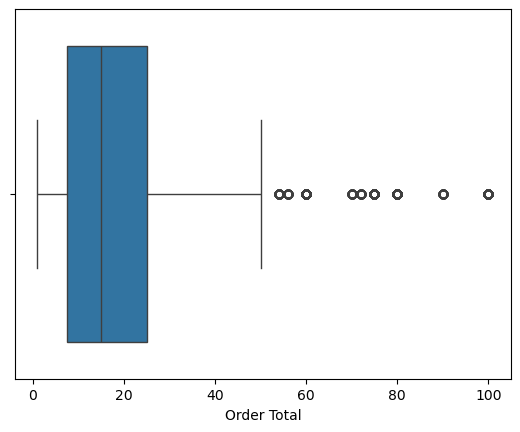

In [564]:
sns.boxplot(df,x='Order Total')
##finding out biggest orders
#biggest one is a 100 dollars

<Axes: xlabel='Order Total'>

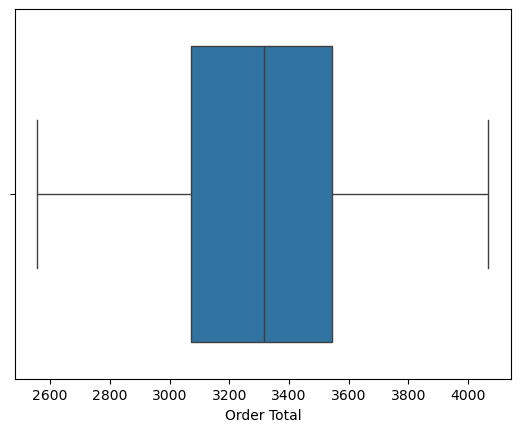

In [565]:
total_customer_spent= (
    df.groupby('Customer ID')['Order Total']
      .sum()
      .reset_index()
)
sns.boxplot(total_customer_spent,x='Order Total')
##most customers spent around 3300 dollars in total


<Axes: xlabel='Year', ylabel='count'>

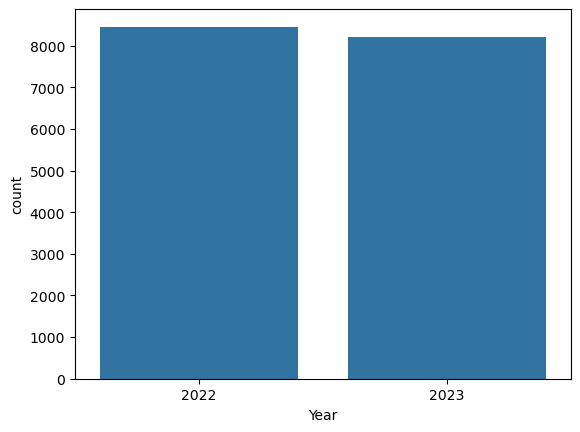

In [566]:
sns.countplot(df,x='Year')
##year 2022 was more successful than 2023

In [567]:
px.bar(df['Day Name'].value_counts())
##friday is the busiest day of the week

In [568]:
##bivariate analysis

In [569]:
px.scatter(df, x='Quantity', y='Order Total', trendline='ols')
##increasing quantity does increase total

In [570]:
import plotly.express as px

<Axes: xlabel='Payment Method_Label', ylabel='Order Total'>

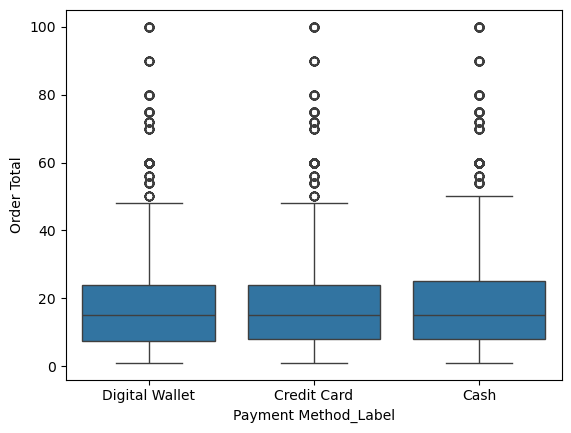

In [571]:
sns.boxplot(data=df, x='Payment Method_Label', y='Order Total')
##no preferred method against the total bill

<Axes: xlabel='Category_Label', ylabel='Season'>

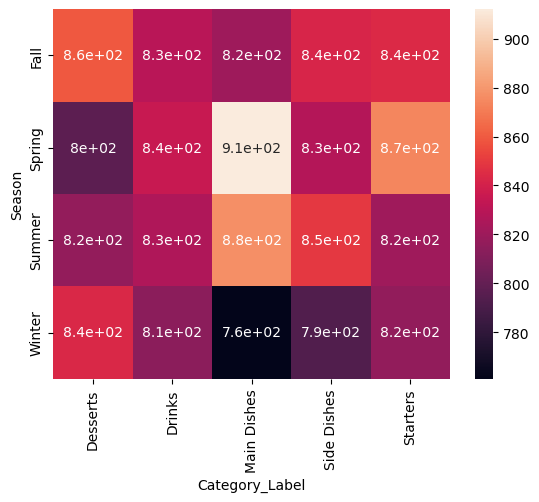

In [572]:
sns.heatmap(pd.crosstab(df['Season'], df['Category_Label']), annot=True)
##in fall they sell desserts most
##in spring main dishes
#in summer main dishes
##in winter desserts

In [573]:
px.line(df.groupby('Month')['Order Total'].sum().reset_index(), x='Month', y='Order Total')
##march has the most total sales and sales are lowest in month 2 go up in 3 and then decline

In [574]:
df.to_csv('cleaned_restaurant_data.csv', index=False)

this analysis answers which season is the most busy and want are the main items and drivers causing revenue
it also checks if loyal customers pay more

after analysis we found that:  

->march is the busiest month with a huge spike from months before while winter and fall face slight problem
restaurant may want to introduce offers or new items in this month or even spend more in their marketing  

->analysis showed that we have many recurring customers,all customers come back  

->analysis showed that there is no correlation between customer spend and customer loyality  

->analysis also showed that most selling category is main dishes and most selling item is beef chili  

->analysis showed that highest payment method is cash  
